12-10-21 Riddler Classic https://fivethirtyeight.com/features/en-garde-can-you-win-the-fencing-relay/

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [160]:
def permute(list):
    ans = []
    
    def helper(cume, list):
        if len(cume) == 3:
            if cume not in ans:
                ans.append(cume.copy())
            return
        for i in range(len(list)):
            cume.append(list[i])
            helper(cume, list[:i]+list[i+1:])
            cume.pop()
    helper([], list)
    return ans

def simulation(a_score, b_score, prob, limit):
    while a_score < limit and b_score < limit:
        turn = np.random.uniform(0, 1)
        if turn < prob:
            a_score += 1
        else:
            b_score += 1
    return a_score, b_score

def to_45(probabilities):
    a0 = 0
    b0 = 0
    a1, b1 = simulation(a0, b0, probabilities[0], 15)
    a2, b2 = simulation(a1, b1, probabilities[1], 30)
    a3, b3 = simulation(a2, b2, probabilities[2], 45)
    return [a1, b1, a2, b2, a3, b3]


In [161]:
orders = permute([0.75, 0.5, 0.25])
print(orders)

[[0.75, 0.5, 0.25], [0.75, 0.25, 0.5], [0.5, 0.75, 0.25], [0.5, 0.25, 0.75], [0.25, 0.75, 0.5], [0.25, 0.5, 0.75]]


In [162]:
zero = []
one = []
two = []
three = []
four = []
five = []
dict = {0:zero, 1: one, 2:two, 3:three, 4:four, 5:five}

for i in range(len(orders)):
    for j in range(100000):
        dict[i].append(to_45(orders[i]))
strat_755025 = pd.DataFrame(zero, columns = ['a1', 'b1', 'a2', 'b2', 'a3', 'b3'])
strat_752550 = pd.DataFrame(one, columns = ['a1', 'b1', 'a2', 'b2', 'a3', 'b3'])
strat_507525 = pd.DataFrame(two, columns = ['a1', 'b1', 'a2', 'b2', 'a3', 'b3'])
strat_502575 = pd.DataFrame(three, columns = ['a1', 'b1', 'a2', 'b2', 'a3', 'b3'])
strat_257550 = pd.DataFrame(four, columns = ['a1', 'b1', 'a2', 'b2', 'a3', 'b3'])
strat_255075 = pd.DataFrame(five, columns = ['a1', 'b1', 'a2', 'b2', 'a3', 'b3'])

In [163]:
strat_755025['strat'] = '75-50-25'
strat_752550['strat'] = '75-25-50'
strat_507525['strat'] = '50-75-25'
strat_502575['strat'] = '50-25-75'
strat_257550['strat'] = '25-75-50'
strat_255075['strat'] = '25-50-75'

In [164]:
strat_755025['win_percent'] = strat_755025[strat_755025.a3 == 45].count()['a3']/100000
strat_752550['win_percent'] = strat_752550[strat_752550.a3 == 45].count()['a3']/100000
strat_507525['win_percent'] = strat_507525[strat_507525.a3 == 45].count()['a3']/100000
strat_502575['win_percent'] = strat_502575[strat_502575.a3 == 45].count()['a3']/100000
strat_257550['win_percent'] = strat_257550[strat_257550.a3 == 45].count()['a3']/100000
strat_255075['win_percent'] = strat_255075[strat_255075.a3 == 45].count()['a3']/100000
strat_255075.head()

,a1,b1,a2,b2,a3,b3,strat,win_percent
0,3,15,5,30,45,43,25-50-75,0.93131
1,7,15,16,30,45,39,25-50-75,0.93131
2,5,15,29,30,45,32,25-50-75,0.93131
3,5,15,23,30,45,38,25-50-75,0.93131
4,7,15,21,30,45,38,25-50-75,0.93131


In [165]:
main_df = pd.concat([strat_755025, strat_752550, strat_507525, strat_502575, strat_257550, strat_255075])
main_df.head()

,a1,b1,a2,b2,a3,b3,strat,win_percent
0,15,8,30,16,39,45,75-50-25,0.06872
1,15,9,30,28,38,45,75-50-25,0.06872
2,15,5,29,30,34,45,75-50-25,0.06872
3,15,5,30,18,40,45,75-50-25,0.06872
4,15,6,30,21,39,45,75-50-25,0.06872


In [166]:
cte = main_df.assign(Win_Rate = main_df['win_percent'], a2_gap = main_df['a2']-main_df['a1'], b2_gap = main_df['b2']-main_df['b1'], a3_gap = main_df['a3']-main_df['a2'], b3_gap = main_df['b3']-main_df['b2']).groupby(['strat', 'win_percent'])['Win_Rate', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'a2_gap', 'b2_gap', 'a3_gap', 'b3_gap'].mean().sort_values(by=['win_percent'], ascending = False)
cte['Strategy'] = ['25-50-75', '50-25-75', '25-75-50', '75-25-50', '50-75-25', '75-50-25']
cte.head(6)

/var/folders/qb/m523t88x4cbc9m38670pqwvm0000gn/T/ipykernel_22630/640776949.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cte = main_df.assign(Win_Rate = main_df['win_percent'], a2_gap = main_df['a2']-main_df['a1'], b2_gap = main_df['b2']-main_df['b1'], a3_gap = main_df['a3']-main_df['a2'], b3_gap = main_df['b3']-main_df['b2']).groupby(['strat', 'win_percent'])['Win_Rate', 'a1', 'b1', 'a2', 'b2', 'a3', 'b3', 'a2_gap', 'b2_gap', 'a3_gap', 'b3_gap'].mean().sort_values(by=['win_percent'], ascending = False)


,,Win_Rate,a1,b1,a2,b2,a3,b3,a2_gap,b2_gap,a3_gap,b3_gap,Strategy
strat,win_percent,,,,,,,,,,,,
25-50-75,0.93131,0.93131,4.99193,14.99530,19.80377,29.79234,44.63308,38.08094,14.81184,14.79704,24.82931,8.28860,25-50-75
50-25-75,0.92297,0.92297,12.82156,12.82885,18.51501,29.97752,44.59326,38.66678,5.69345,17.14867,26.07825,8.68926,50-25-75
25-75-50,0.82441,0.82441,4.99536,14.99537,29.78668,23.25384,44.27556,37.75635,24.79132,8.25847,14.48888,14.50251,25-75-50
75-25-50,0.17277,0.17277,14.99530,5.01159,23.24488,29.79186,37.73972,44.29725,8.24958,24.78027,14.49484,14.50539,75-25-50
50-75-25,0.07407,0.07407,12.82813,12.84919,29.97608,18.56252,38.64063,44.61117,17.14795,5.71333,8.66455,26.04865,50-75-25
75-50-25,0.06872,0.06872,14.99563,5.00974,29.79231,19.81471,38.07558,44.63458,14.79668,14.80497,8.28327,24.81987,75-50-25


Text(0, 0.5, 'Win Percent')

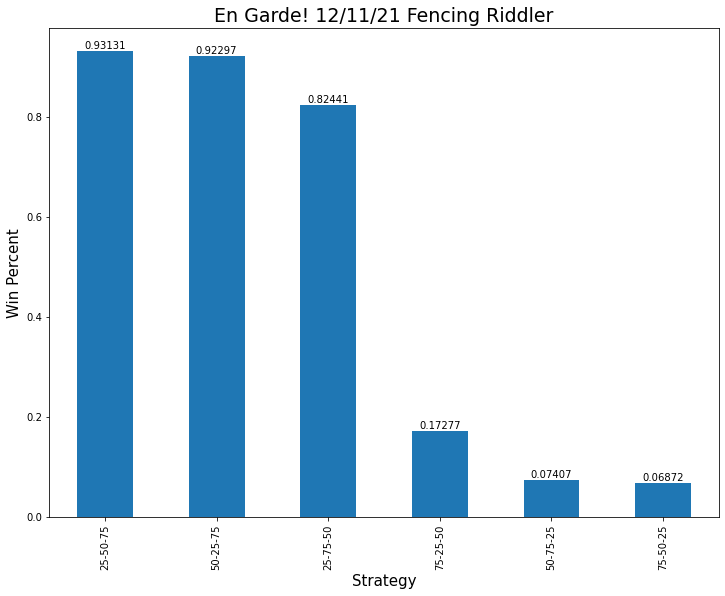

In [167]:
ax = cte.plot.bar(x = 'Strategy', y = 'Win_Rate', figsize = (12, 9), legend = False)
ax.bar_label(ax.containers[0])
plt.title('En Garde! 12/11/21 Fencing Riddler', fontsize = 19)
plt.xlabel('Strategy', fontsize = 15)
plt.ylabel('Win Percent', fontsize = 15)

In [168]:
cte.head(6)

,,Win_Rate,a1,b1,a2,b2,a3,b3,a2_gap,b2_gap,a3_gap,b3_gap,Strategy
strat,win_percent,,,,,,,,,,,,
25-50-75,0.93131,0.93131,4.99193,14.99530,19.80377,29.79234,44.63308,38.08094,14.81184,14.79704,24.82931,8.28860,25-50-75
50-25-75,0.92297,0.92297,12.82156,12.82885,18.51501,29.97752,44.59326,38.66678,5.69345,17.14867,26.07825,8.68926,50-25-75
25-75-50,0.82441,0.82441,4.99536,14.99537,29.78668,23.25384,44.27556,37.75635,24.79132,8.25847,14.48888,14.50251,25-75-50
75-25-50,0.17277,0.17277,14.99530,5.01159,23.24488,29.79186,37.73972,44.29725,8.24958,24.78027,14.49484,14.50539,75-25-50
50-75-25,0.07407,0.07407,12.82813,12.84919,29.97608,18.56252,38.64063,44.61117,17.14795,5.71333,8.66455,26.04865,50-75-25
75-50-25,0.06872,0.06872,14.99563,5.00974,29.79231,19.81471,38.07558,44.63458,14.79668,14.80497,8.28327,24.81987,75-50-25


In [169]:
a1_list = cte['a1'].tolist()
b1_list = cte['b1'].tolist()
a2_list = cte['a2_gap'].tolist()
b2_list = cte['b2_gap'].tolist()
a3_list = cte['a3_gap'].tolist()
b3_list = cte['b3_gap'].tolist()
cte2 = pd.DataFrame({'Round1_A': a1_list, 'Round1_B': b1_list, 'Round2_A': a2_list, 'Round2_B': b2_list, 'Round3_A': a3_list, 'Round3_B': b3_list}, ['25-50-75', '50-25-75', '25-75-50', '75-25-50', '50-75-25', '75-50-25'])
cte2.head(6)

,Round1_A,Round1_B,Round2_A,Round2_B,Round3_A,Round3_B
25-50-75,4.99193,14.99530,14.81184,14.79704,24.82931,8.28860
50-25-75,12.82156,12.82885,5.69345,17.14867,26.07825,8.68926
25-75-50,4.99536,14.99537,24.79132,8.25847,14.48888,14.50251
75-25-50,14.99530,5.01159,8.24958,24.78027,14.49484,14.50539
50-75-25,12.82813,12.84919,17.14795,5.71333,8.66455,26.04865
75-50-25,14.99563,5.00974,14.79668,14.80497,8.28327,24.81987


51.98730000000002


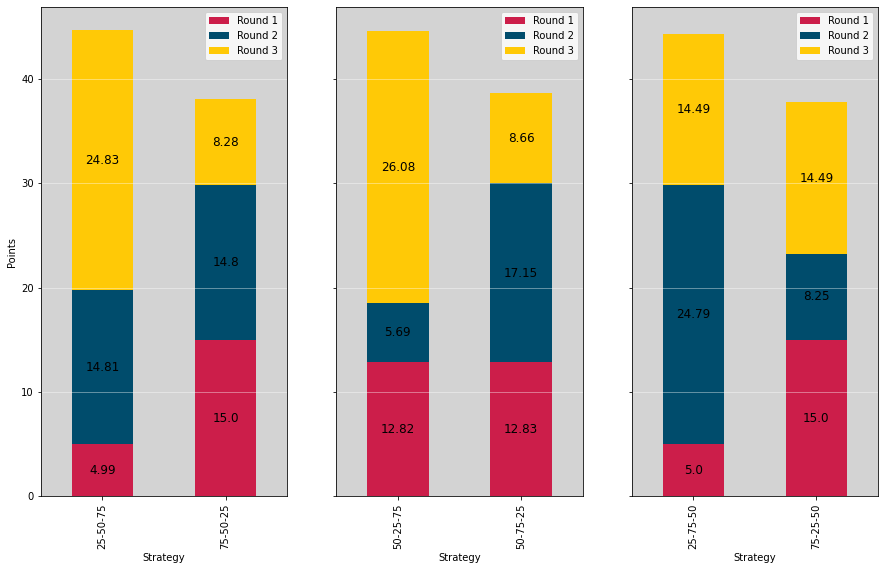

In [180]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15, 9), sharey= True)
ax1 = cte2.iloc[np.r_[0:1, 5:6]][['Round1_A', 'Round2_A', 'Round3_A']].plot.bar(stacked = True, ax=axes[0], xlabel = 'Strategy', ylabel = 'Points', color = ['#CC1E4A', '#004C6C', '#FFC906'])
#RBR livery in honor of Verstappen's maiden WDC title
ax1.legend(labels= ['Round 1', 'Round 2', 'Round 3'])
ax1.set_facecolor('lightgray')
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.grid(which = 'major', axis = 'y', linewidth = 1, color = 'white', alpha = 0.39)
for rect in ax1.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f'{height}'
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0:
        ax1.text(label_x, label_y, round(float(label_text), 2), ha='center', va='center', fontsize=12)

ax2 = cte2.iloc[np.r_[1:2, 4:5]][['Round1_A', 'Round2_A', 'Round3_A']].plot.bar(stacked = True, ax=axes[1], xlabel = 'Strategy', ylabel = 'Points', color = ['#CC1E4A', '#004C6C', '#FFC906'])
#RBR livery in honor of Verstappen's maiden WDC title
ax2.legend(labels= ['Round 1', 'Round 2', 'Round 3'])
ax2.set_facecolor('lightgray')
ax2.yaxis.set_major_locator(MultipleLocator(10))
ax2.grid(which = 'major', axis = 'y', linewidth = 1, color = 'white', alpha = 0.39)
for rect in ax2.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f'{height}'
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0:
        ax2.text(label_x, label_y, round(float(label_text), 2), ha='center', va='center', fontsize=12)

ax3 = cte2.iloc[np.r_[2:3, 3:4]][['Round1_A', 'Round2_A', 'Round3_A']].plot.bar(stacked = True, ax=axes[2], xlabel = 'Strategy', ylabel = 'Points', color = ['#CC1E4A', '#004C6C', '#FFC906'])
#RBR livery in honor of Verstappen's maiden WDC title
ax3.legend(labels= ['Round 1', 'Round 2', 'Round 3'])
ax3.set_facecolor('lightgray')
ax3.yaxis.set_major_locator(MultipleLocator(10))
ax3.grid(which = 'major', axis = 'y', linewidth = 1, color = 'white', alpha = 0.39)
for rect in ax3.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f'{height}'
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0:
        ax3.text(label_x, label_y, round(float(label_text), 2), ha='center', va='center', fontsize=12)